# A* – využití heuristik

In [1]:
%matplotlib inline
from math import inf
from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step
import solutions

## Heuristiky

Všechny uvedené algoritmy zatím nevyužívali informace, jak moc jsou zkoumané stavy blízko cíli. Takovou informaci typicky neznáme přesně,
ale dokážeme ji přibližně odhadnout. Takovému optimistickému odhadu zbývající ceny (vzdálenosti do cíle) říkáme *heuristika* a hledání pak označujeme za *informované*.

Nechť na světě nejsou červí díry (zjednoduší nám to vymyšlení vhodné heuristiky). 
Příkladem dolního odhadu na cenu do cíle pak může být vertikální vzdálenost od cíle vynásobená cenou cesty vpřed.
Pokud se na mapě nacházejí slepé uličky, nebude tento odhad vždy přesný, nicméně poskytuje dolní mez skutečné zbývající ceny.

In [2]:
ACTION_COSTS = {'l': 3, 'f': 2, 'r': 3}

def heuristic_distance(state):
    vertical_distance = state.height - state.row
    # Jaka by byla cena, kdyby raketka mohla letet porad rovne.
    return vertical_distance * ACTION_COSTS['f']

state = parse_state(
'| | | | | |'
'|A| |A| | |'
'| |A|A| |A|'
'| |S|A| | |'
'| | | | | |')
heuristic_distance(state)

6

## Informované hledání

Pokud máme heuristiku, můžeme ji přímočaře zakomponovat jak do hladového hledání (v každém kroku poletíme do stavu s nejnižším heuristickým odhadem vzdálenosti do cíle), tak do prohledávání s cenou (UCS).

Algoritmus, který vzniky přidáním heuristiky do UCS se nazývá A* a jde o velmi jednoduché rozšíření: místo toho, abychom vybírali z okraje stavy s nejnižší cenou dosavadního plánu, budeme vybírat stav minimalizující součet ceny dosavadního plánu a heuristického odhadu ceny za zbytek cesty (součet udává dolní odhad celkové ceny cesty ze startu do cíle).


## A* krok za krokem

Podívejme se, jak by vypadal prohledávací strom pro A\*. Pro každý stav v prohledávacím stromě nyní uvádíme *g+h=f*, kde *g* je cena plánu do tohoto stavu, *h* je hodnota heuristiky pro zbytek cesty a *f* je jejich součet. Všimněte si, které stavy nebylo nutné prozkoumat oproti neinformovanému UCS.

Explored: Fringe:              Plans:                  Costs:               Heuristic:
0: -      [c1]                 c1:''                   c1:0                 c1:8 
1: c1     [b2, d2]             + b2:l, d2:r            + b2:3, d2:3         + b2:6, d2:6
2: b2     [a3, d2]             + a3:ll                 + a3:6               + a3:4
3: d2     [a3, d3]             + d3:rf                 + d3:5               + d3:4
4: d3     [a3, d4, e4]         + d4:rff, e4:rfr        + d4:7, e4:8         + d4:2, e4:2
5: d4     [a3, d5, e4, e5]     + d5:rfff, e5:rffr      + d5:9, e5:10        + d5:0, e5:0
6: d5     [a3, e4, e5]                                                           


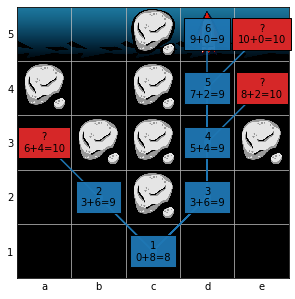

In [3]:
state = parse_state(
'| | |A| | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, heuristic=True,
                      text=True, interactive=False):
    solutions.a_star(state)

## Implementace

<div class="alert alert-block alert-success">
<b>Úkol 8.1: A*</b><br/>
Implementujte funkci <i>a_star(initial_state)</i>,
která vrací nejkratší plán pro cestu z <i>initial_state</i> do cílového stavu nalezený pomocí cen a heuristik.

<p>
Tipy:
<ul>
<li>
Vyjděte z vašeho řešení UCS - stačí 2 malé změny a je hotovo.
</li>
<li>
První změnou je ukládání vypočtených heuristických hodnot:<br>
`heuristic[next_state] = heuristic_distance(next_state)`.<br>
Tento výpočet stačí provést jednou při objevení stavu.
</li>
<li>
Druhou změnou je výpočet priority, která je nyní součtem dosavadní ceny a heuristického odhadu ceny zbytku plánu, tj. `costs[s] + heuristic[s]`.
</li>
</ul>
</p>
</div>

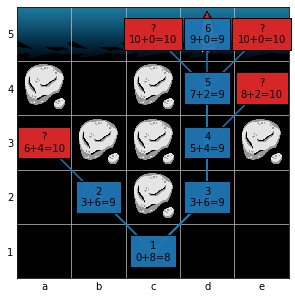

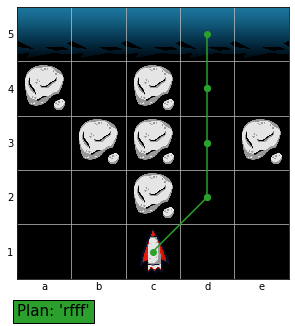

In [4]:
def a_star(initial_state):
    fringe = {initial_state}
    costs = {initial_state: 0}
    heuristic = {initial_state: heuristic_distance(initial_state)}
    plans = {initial_state: ''}
    log_search_step(None, fringe, plans, costs, heuristic)
    while fringe:
        # TODO: Implementujte krok A*.
        log_search_step(state, fringe, plans, costs, heuristic)

state = parse_state(
'| | | | | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, heuristic=True, interactive=False):
    plan = solutions.a_star(state)  # Vzorove reseni.
    #plan = a_star(state)  # Vase reseni.
show_plan(state, plan)

## Vymýšlení heuristik

Aby bylo zaručeno nalezení nejkratší cesty, musí být heuristika optimistickým (spodním) odhadem na skutečnou cenu.
Na druhou stranu, čím těsnější (přesnější) odhad bude, tím efektivnější
prohledávání.

Heuristiky závisí na řešeném problému.
Základním přístupem k vymýšlení heuristik je "relaxace problému",
což znamená vypuštění nějakých podmínek ze zadání problému tak,
aby bylo problém triviální vyřešit (aby šlo heuristiku rychle spočítat).
Naše heuristika vznikla tak, že jsme odstranili podmínku,
že nelze letět přes asteroidy.


## Shrnutí

<div class="alert alert-block alert-info">
<ul>
<li>
A-star je rozšíření UCS, ve kterém z okraje vybíráme stav s nejnižším součtem cena dosavadního plánu + odhad ceny za zbývající cestu do cíle. </li>
<li>
Aby bylo zaručeno nalezení nejkratší cesty, musí být heuristika optimistickým (spodním) odhadem na skutečnou cenu.
Na druhou stranu, čím těsnější (přesnější) odhad bude, tím efektivnější
prohledávání.
</li>
<li>
Přípustnou heuristiku lze získat ze zadání problému vypuštěním některých jeho omezení tak, aby se stal triviálním na vyřešení.
</li>
</ul>
</div>